In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [17]:
from google.colab import files
files.upload()

##Data Exploration

In [3]:
data = pd.read_csv('census.csv')
data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##Data Visualization

In [4]:
np.unique(data.income, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

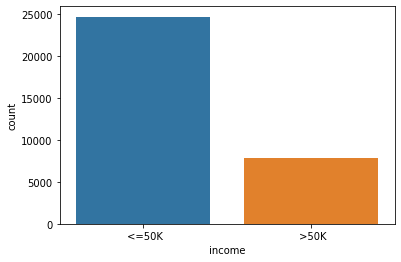

In [5]:
sns.countplot(x = data.income)

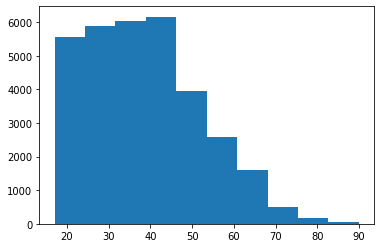

In [6]:
plt.hist(x=data.age);

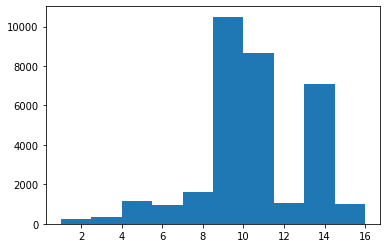

In [7]:
plt.hist(data["education-num"]);

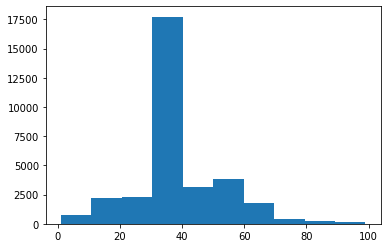

In [8]:
plt.hist(data["hour-per-week"]);

In [13]:
graph = px.treemap(data, path=['workclass', 'age'])
graph.show()

In [15]:
graph = px.treemap(data, path=['occupation', 'age'])
graph.show()

In [16]:
graph = px.parallel_categories(data, dimensions=['occupation', 'relationship'])
graph.show()

##Split Predictors and Classes

In [68]:
data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [91]:
X_data = data.iloc[:,0:14].values
X_data

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [70]:
y_data = data.iloc[:,14].values
y_data

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##LabelEncoder - Predictors

In [71]:
from sklearn.preprocessing import LabelEncoder

####### BAD WAY #######

''''
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_country = LabelEncoder()

X_data[:,1] = le_workclass.fit_transform(X_data[:,1])
X_data[:,3] = le_education.fit_transform(X_data[:,3])
X_data[:,5] = le_marital.fit_transform(X_data[:,5])
X_data[:,6] = le_occupation.fit_transform(X_data[:,6])
X_data[:,7] = le_relationship.fit_transform(X_data[:,7])
X_data[:,8] = le_race.fit_transform(X_data[:,8])
X_data[:,9] = le_sex.fit_transform(X_data[:,9])
X_data[:,13] = le_country.fit_transform(X_data[:,13])

X_data[0]
'''

"'\nle_workclass = LabelEncoder()\nle_education = LabelEncoder()\nle_marital = LabelEncoder()\nle_occupation = LabelEncoder()\nle_relationship = LabelEncoder()\nle_race = LabelEncoder()\nle_sex = LabelEncoder()\nle_country = LabelEncoder()\n\nX_data[:,1] = le_workclass.fit_transform(X_data[:,1])\nX_data[:,3] = le_education.fit_transform(X_data[:,3])\nX_data[:,5] = le_marital.fit_transform(X_data[:,5])\nX_data[:,6] = le_occupation.fit_transform(X_data[:,6])\nX_data[:,7] = le_relationship.fit_transform(X_data[:,7])\nX_data[:,8] = le_race.fit_transform(X_data[:,8])\nX_data[:,9] = le_sex.fit_transform(X_data[:,9])\nX_data[:,13] = le_country.fit_transform(X_data[:,13])\n\nX_data[0]\n"

In [87]:
X_data[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [73]:
####### BETTER WAY #######

def labelEncFunc(data):
  for i in range(len(data[0])):
    if (not str(data[0][i]).isnumeric()):
      label_encoder = LabelEncoder()
      data[:,i] = label_encoder.fit_transform(X_data[:,i])
  return data

In [76]:
X_data = labelEncFunc(X_data)
X_data[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

##OneHotEncoder - Predictors

In [77]:
len(np.unique(data.workclass))

9

In [92]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_data = onehotencoder.fit_transform(X_data).toarray()
X_data[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [99]:
X_data.shape

(32561, 108)

##Value Scaling - Features With The Same Scale

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

##Training and Test Split

In [101]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size = 0.25)

In [102]:
X_data_train.shape

(24420, 108)

##Save Variables

In [ ]:
import pickle

with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_data_train, X_data_test, y_data_train, y_data_test], f)